In [0]:
import torch
import torch.nn.functional as F
from torchvision import datasets , transforms
import matplotlib.pyplot as plt
from torch import nn
from torch import optim
import numpy as np

In [0]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.FashionMNIST('FashionMNIST/' , download=True,train = True , transform= transform) 
testset = datasets.FashionMNIST('FashionMNIST/' , download=True , train=False , transform = transform)


Extracting FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



Extracting FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw



Extracting FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



Extracting FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw
Processing...
Done!


In [0]:
dataloader = torch.utils.data.DataLoader(trainset , batch_size=100 , shuffle = True)
testloader = torch.utils.data.DataLoader(testset , batch_size = 100 , shuffle = True)

In [0]:
dataiter = iter(dataloader)
images , labels = dataiter.next()

testiter = iter(testloader)
test_images , test_labels = testiter.next()

In [0]:
# building the archictecture
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden0 = nn.Linear(784 , 256)
    self.hidden1 = nn.Linear(256 , 128)
    self.hidden2 = nn.Linear(128 , 64)
    self.hidden3 = nn.Linear(64 , 10)

    self.dropout = nn.Dropout(p = 0.2)

  def forward(self , x):

    x = x.reshape(x.shape[0] , -1)

    x = self.dropout(F.relu(self.hidden0(x)))
    x = self.dropout(F.relu(self.hidden1(x)))
    x = self.dropout(F.relu(self.hidden2(x)))
    
    x = F.log_softmax(self.hidden3(x) , dim=1)

    return x 

In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam( model.parameters() , lr = 0.001)

In [0]:
epochs = 10

train_losses , test_losses = [] , []
for e in range(epochs):
  running_loss = 0
  for images , labels in dataloader:
    optimizer.zero_grad()
    logits = model(images)
    loss = criterion(logits , labels )
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    
    test_loss = 0
    accuracy = 0

    with torch.no_grad():
      model.eval()
      for images , labels in testloader:
        log_ps = model(images)
        test_loss += criterion(log_ps , labels)

        ps = torch.exp(log_ps)
        value , ps_class = ps.topk(1 , dim = 1)
        equal = ps_class == labels.reshape(100 , 1)
        accuracy += torch.mean(equal.type(torch.FloatTensor))
      model.train()
      train_losses.append(running_loss/len(dataloader))
      test_losses.append(test_loss/len(testloader))

      print("epochs {}/{}" .format(e+1 , epochs),
              "training loss: {:.3f}..".format(running_loss/len(dataloader)),
              "test loss: {:.3f}..".format(test_loss/len(testloader)),
              "test Accuracy: {:.3f}..".format(accuracy/len(testloader)))  

epochs 1/10 training loss: 0.287.. test loss: 0.322.. test Accuracy: 0.885..
epochs 2/10 training loss: 0.279.. test loss: 0.321.. test Accuracy: 0.886..
epochs 3/10 training loss: 0.274.. test loss: 0.328.. test Accuracy: 0.882..
epochs 4/10 training loss: 0.267.. test loss: 0.328.. test Accuracy: 0.883..
epochs 5/10 training loss: 0.265.. test loss: 0.324.. test Accuracy: 0.885..
epochs 6/10 training loss: 0.265.. test loss: 0.328.. test Accuracy: 0.883..
epochs 7/10 training loss: 0.254.. test loss: 0.319.. test Accuracy: 0.888..
epochs 8/10 training loss: 0.252.. test loss: 0.330.. test Accuracy: 0.886..
epochs 9/10 training loss: 0.248.. test loss: 0.323.. test Accuracy: 0.891..
epochs 10/10 training loss: 0.245.. test loss: 0.323.. test Accuracy: 0.889..


In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd content/drive/My\ Drive

/content/drive/My Drive


In [0]:
cd Model\ files

/content/drive/My Drive/Model files


In [0]:
torch.save(model , '/content/drive/My Drive/Model files/my_model.pth')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Classifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
model = torch.load('/content/drive/My Drive/Model files/my_model.pth')

In [0]:
view_classify(test_image[0], ps, version="MNIST")

torch.Size([100, 1, 28, 28])

In [0]:
model.eval()
img = test_images[0].reshape(1, 784)
with torch.no_grad():
  for images , labels in testloader:
    logits = model(img)

In [0]:
ps = torch.exp(logits)

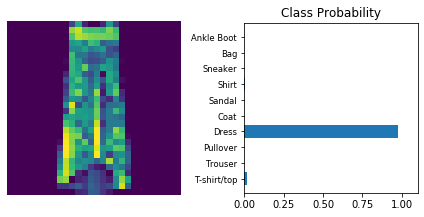

In [0]:
view_classify(test_images[0], ps, version="Fashion")